# Load and Inspect the Data

In [35]:
import pandas as pd

# load data set
df = pd.read_csv("amazon_sales_data 2025.csv")


# Perview Data
print(df.shape)    # (250, 11)

df.info()

df.head()



(250, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


# 🧹 Step 2: Data Cleaning Tasks

## 1. Check for Missing Values

In [16]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

## 2. Convert Data Types

In [20]:
# convert date column

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')


# Convert Price and Total Sales to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')


## 3. Check for duplicate

In [21]:
df.duplicated().sum()

np.int64(0)

## Perview Again

In [22]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           250 non-null    object        
 1   Date               250 non-null    datetime64[ns]
 2   Product            250 non-null    object        
 3   Category           250 non-null    object        
 4   Price              250 non-null    int64         
 5   Quantity           250 non-null    int64         
 6   Total Sales        250 non-null    int64         
 7   Customer Name      250 non-null    object        
 8   Customer Location  250 non-null    object        
 9   Payment Method     250 non-null    object        
 10  Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.6+ KB


,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


# 🎯 Feature Engineering 

## 1. Extract Date Features from the date column

In [23]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()

#👉 This helps in analyzing seasonal trends (monthly/weekly sales).

# 2. Recalculate Total Sales (Validation)

In [25]:
# Total Sales
df['Computed_Sales'] = df['Price'] * df['Quantity']

# Comparing with existing total sales:
(df['Total Sales'] == df['Computed_Sales']).value_counts()

True    250
Name: count, dtype: int64

## 3. Customer-Level Features

In [36]:
# Aggregate per customer:
# identifying top customers.
customer_summary = df.groupby('Customer Name').agg({
    'Order ID': 'count',
    'Total Sales': 'sum',
    'Quantity': 'sum'
}).rename(columns={'Order ID':'Total Orders'})
print(customer_summary)

               Total Orders  Total Sales  Quantity
Customer Name                                     
Chris White              22        18885        56
Daniel Harris            23        18945        66
David Lee                26        22665        72
Emily Johnson            22        23475        66
Emma Clark               32        29700        95
Jane Smith               30        31185        88
John Doe                 26        26870        71
Michael Brown            24        22655        75
Olivia Wilson            29        36170        83
Sophia Miller            16        13295        42


## 4. Category-Level Features

In [37]:
# Aggregate sales per category:

# Seeing most profitable categories

category_summary = df.groupby('Category').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum'
})
print(category_summary)

                 Total Sales  Quantity
Category                              
Books                   1035        69
Clothing                3540       115
Electronics           129950       348
Footwear                4320        72
Home Appliances       105000       110


## 5. Payment Behavior

In [38]:
# Count orders by payment method:

payment_summary = df['Payment Method'].value_counts()
print(payment_summary)

Payment Method
PayPal         60
Credit Card    54
Debit Card     53
Gift Card      42
Amazon Pay     41
Name: count, dtype: int64


## 6. Order Status Analysis

In [39]:
# Check order fulfillment vs cancellations:

status_summary = df['Status'].value_counts()
print(status_summary)

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64


# 📊 Next Step: Visualization Tasks

- Now let’s use Matplotlib + Seaborn to explore the data visually

## 1. Sales by Category

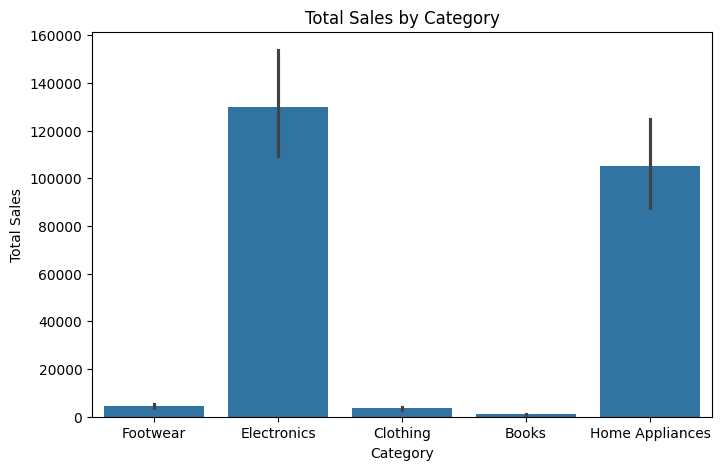

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Total Sales', data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.savefig('Sales_by_Category', dpi=300, bbox_inches = 'tight')
plt.show()


## 2. Top 10 Products by Sales

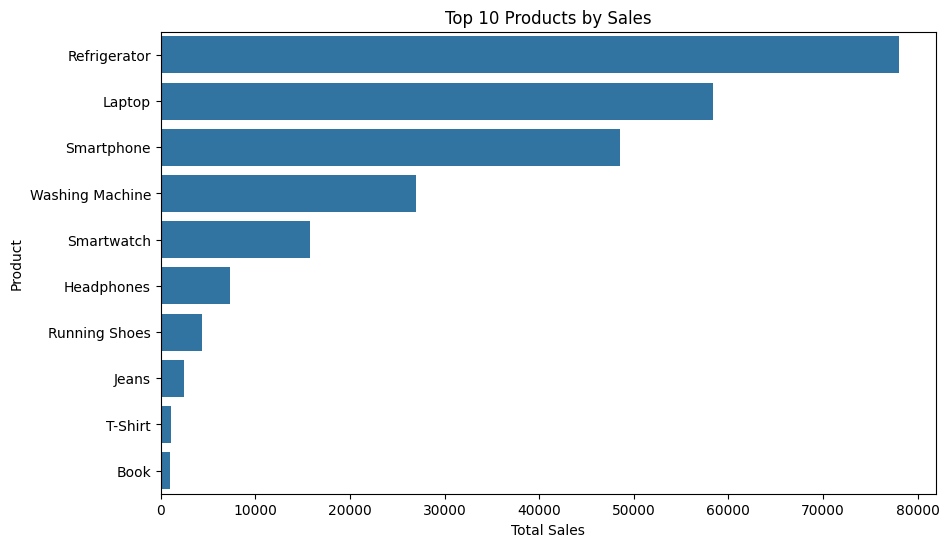

In [52]:
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.savefig('Total Sales', dpi=300, bbox_inches = 'tight')
plt.show()

## 3. Sales Trend Over Time (Monthly)

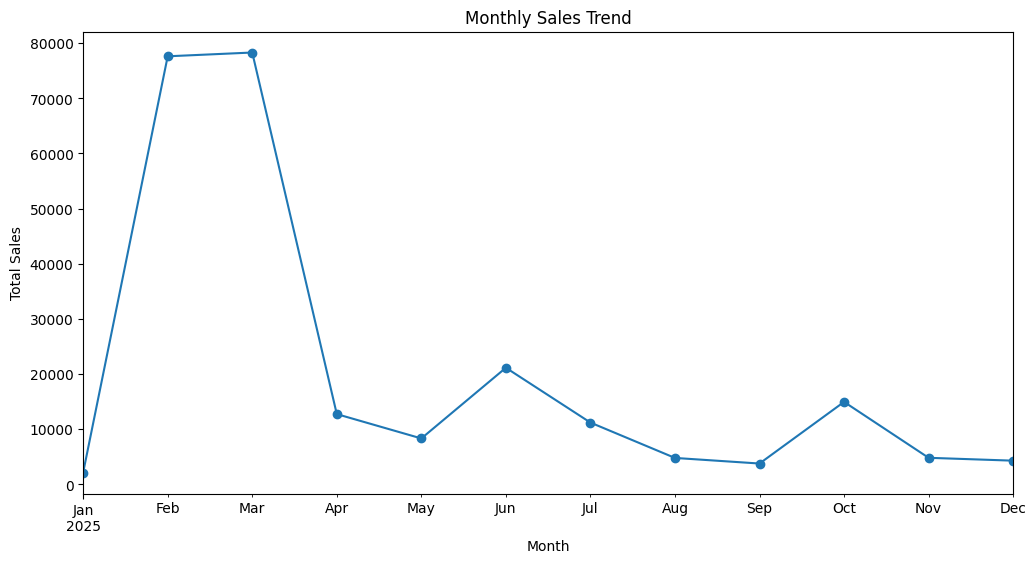

In [51]:
# converting date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Total Sales'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.savefig('Monthly Sales Trends', dpi=300, bbox_inches = 'tight')
plt.show()

## 4. Sales by Payment Method

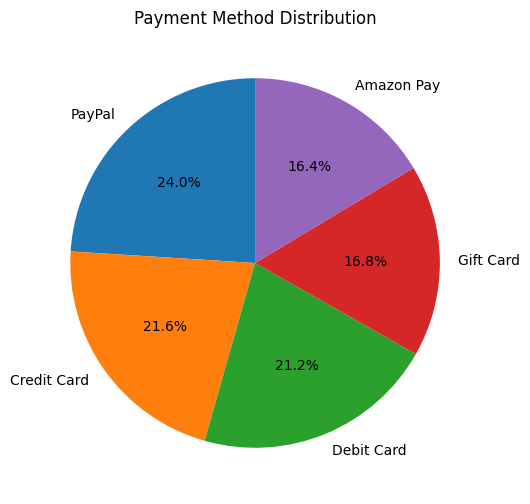

In [53]:
plt.figure(figsize=(6,6))
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.savefig('Payment Method Distribution', dpi=300, bbox_inches = 'tight')
plt.show()

## 5. Order Status Distribution

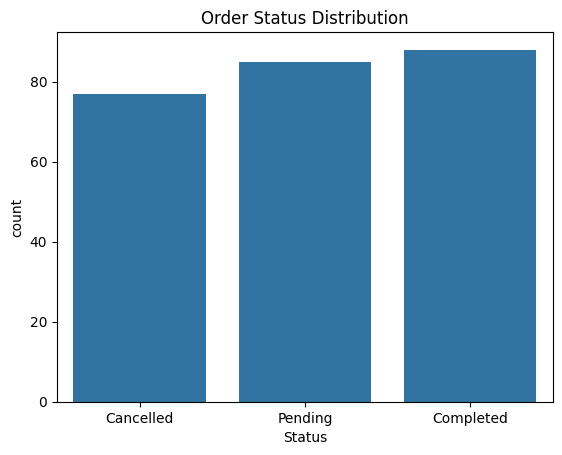

In [54]:
sns.countplot(x='Status', data=df)
plt.title("Order Status Distribution")
plt.savefig('Order Status Distribution', dpi=300, bbox_inches = 'tight')
plt.show()